##### Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
import cv2

In [3]:
import skimage.morphology

In [4]:
import argparse
import cv2
import imutils
import time

In [5]:
import scipy

#### 1Q. Develop a program that would use appropriate hand coded morphological operations to enhance the given fingerprint.png image as the resultant output image 

In [6]:
default_structure = np.ones((3, 3))

In [7]:
def index_check(i) :
    if i < 0 :
        return 0 
    return i  

In [8]:
# Function for Dilation
def dilation(img  , structuring_element = default_structure ) :
    img = np.asarray(img)
    structuring_element = np.asarray(structuring_element)
    struct_shape = structuring_element.shape   # ste_shp
    #print(img.shape[0] ,  img.shape[1],"\n")
    dilated_img = np.zeros((img.shape[0], img.shape[1]))
    struct_origin = ((structuring_element.shape[0]-1)//2, (structuring_element.shape[1]-1)//2)      ## ste_origin
    for i in range(len(img)):
        for j in range(len(img[0])):
            overlap = img[index_check(i - struct_origin[0]):i + (struct_shape[0] - struct_origin[0]), index_check(j - struct_origin[1]):j + (struct_shape[1] - struct_origin[1])]
            shp = overlap.shape
            
            struct_first_row_idx = int(np.fabs(i - struct_origin[0])) if i - struct_origin[0] < 0 else 0
            struct_first_col_idx = int(np.fabs(j - struct_origin[1])) if j - struct_origin[1] < 0 else 0

            struct_last_row_idx = struct_shape[0] - 1 - (i + (struct_shape[0] - struct_origin[0]) - img.shape[0]) if i + (struct_shape[0] - struct_origin[0]) > img.shape[0] else struct_shape[0]-1
            struct_last_col_idx = struct_shape[1] - 1 - (j + (struct_shape[1] - struct_origin[1]) - img.shape[1]) if j + (struct_shape[1] - struct_origin[1]) > img.shape[1] else struct_shape[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.logical_and(structuring_element[struct_first_row_idx:struct_last_row_idx+1, struct_first_col_idx:struct_last_col_idx+1], overlap).any():
                dilated_img[i, j] = 1
                
    return dilated_img
    
    

In [9]:
# Function for Erosion
def erosion(img  , structuring_element = default_structure) :
    img = np.asarray(img)
    structuring_element = np.asarray(structuring_element)
    struct_shape = structuring_element.shape   # ste_shp
    #print(img.shape[0] ,  img.shape[1],"\n")
    eroded_img = np.zeros((img.shape[0], img.shape[1]))
    struct_origin = ((structuring_element.shape[0]-1)//2, (structuring_element.shape[1]-1)//2)      ## ste_origin
    for i in range(len(img)):
        for j in range(len(img[0])):
            overlap = img[index_check(i - struct_origin[0]):i + (struct_shape[0] - struct_origin[0]), index_check(j - struct_origin[1]):j + (struct_shape[1] - struct_origin[1])]
            shp = overlap.shape
            
            struct_first_row_idx = int(np.fabs(i - struct_origin[0])) if i - struct_origin[0] < 0 else 0
            struct_first_col_idx = int(np.fabs(j - struct_origin[1])) if j - struct_origin[1] < 0 else 0

            struct_last_row_idx = struct_shape[0] - 1 - (i + (struct_shape[0] - struct_origin[0]) - img.shape[0]) if i + (struct_shape[0] - struct_origin[0]) > img.shape[0] else struct_shape[0]-1
            struct_last_col_idx = struct_shape[1] - 1 - (j + (struct_shape[1] - struct_origin[1]) - img.shape[1]) if j + (struct_shape[1] - struct_origin[1]) > img.shape[1] else struct_shape[1]-1
            
            
            
            if shp[0] != 0 and shp[1] != 0 and np.array_equal(np.logical_and(overlap, structuring_element[struct_first_row_idx:struct_last_row_idx+1,
                                                                       struct_first_col_idx:struct_last_col_idx+1]),structuring_element[struct_first_row_idx:struct_last_row_idx+1,
                                                                       struct_first_col_idx:struct_last_col_idx+1]):
                eroded_img[i, j] = 1
                
    return eroded_img
            
    

Text(0.5, 1.0, 'Enhanced finger print')

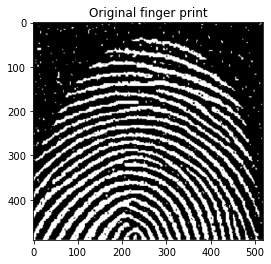

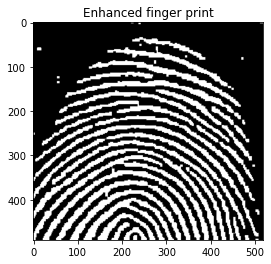

In [10]:
## Function to enhance fingerprint using Erosion and Dilation as given in Class PPT 
def enhance_fingerprint(im) :
    b = np.array([[1,1,1] for i in range(3)])
    first_process = erosion(im,b)
    first_process = erosion(first_process,b)
    second_process = dilation(first_process,b) 
    second_process = dilation(second_process,b) 
    third_process = dilation(second_process,b)
    third_process = dilation(third_process,b)
    fourth_process = erosion(third_process,b)
    fourth_process = erosion(fourth_process,b)
    
    return fourth_process 



im1 = cv2.imread("C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/fingerprint.png")
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im1,cmap = "gray")
plt.title("Original finger print")

plt.figure()
enhanced_im = enhance_fingerprint(im1)
plt.imshow(enhanced_im,cmap = "gray")
plt.title("Enhanced finger print")

    

#### 2Q. Implement a program to count the number of disks in the image disks.png, which has a number of touching black disks on a white background.




Number of disk present in Image (Calculates using CCL)   14





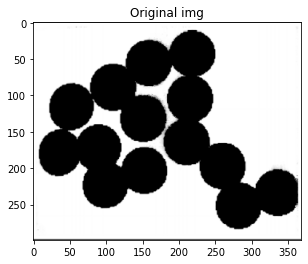

<Figure size 432x288 with 0 Axes>

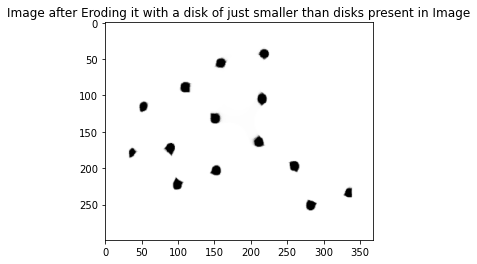

In [11]:
"""
Count_img function will erode the given image with a disk of size just smaller than size of disk present in Image 
Then using CCL Algorithm I've counted the number of disks
"""
def count_img(im) :
    original = im.copy()
    im = 255 - im
    b = skimage.morphology.disk(25)
    #print(b)
    im_erode = cv2.erode(im,b,iterations =  1)
    
    plt.figure()
    plt.imshow(im)
    plt.title("Original img")
    print("\n\n")
    
    a =  im_erode 
    return  255 -a


def recursive_fill(im,x,y,label) :
    im[x][y][0] = - 1 
    for i in range(-1,2) :
        for j in range(-1,2) :
                try :
                    if(im[x+i][y+j][0]  == 0) :
                        im[x+i][y+j][0] = -1 
                        recursive_fill(im,x+i,y+j,label) 
                except :
                    """
                    Invalid location !!!
                    """

def CCL(im) :
    
    label = 0 
    for i in range(im.shape[0]) :
        for j in range(im.shape[1]) :
            #print(im[i][j])
            if(im[i][j][0] == 0) :
                #print(i,j)
                label += 1 
                recursive_fill(im,i,j,label)
                
    return label


im2 = cv2.imread("C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/disks.png")
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(im2)
plt.title("Original img")


plt.figure()
enhanced_im1 = count_img(im2)
plt.imshow(enhanced_im1)
plt.title("Image after Eroding it with a disk of just smaller than disks present in Image")



print("Number of disk present in Image (Calculates using CCL)  ",CCL(enhanced_im1))
print("\n\n")

#### 3Q. The task here is to help a robot to identify a bright orange ball in its surrounding. The ball.bmp is an image obtained from a camera mounted on the robot.  

##### a) Implement a Myrgb2hsi function to convert red-green-blue (RGB) colors to hue saturation intensity (HSI). The function prototype should be: 
	function [H, S, I] = Myrgb2hsi(Im) 
 

In [12]:
im3 = cv2.imread("C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/ball.bmp")
im3 = cv2.cvtColor(im3,cv2.COLOR_BGR2RGB)

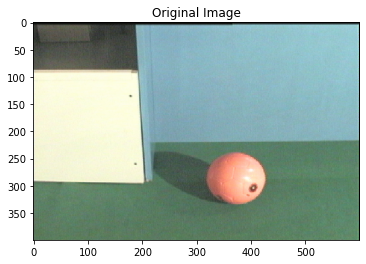

In [13]:
plt.title("Original Image")
plt.imshow(im3)

In [14]:
import cv2
import numpy as np
import math


def Myrgb2hsi(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        rgb = img/255

        #Separate color channels
        blue = rgb[:,:,2]
        green = rgb[:,:,1]
        red = rgb[:,:,0]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)
    
            
            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, green.shape[1]):  
                    
                    numerator = 0.5*((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j]))
                    denomator = math.sqrt((red[i][j] - green[i][j])**2 + (red[i][j] - blue[i][j])*(green[i][j] - blue[i][j]))
                    
                    hue[i][j] = numerator/denomator
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((2* math.pi)) - hue[i][j]
            return hue

        #Merge channels into picture and return image
        
        h = calc_hue(red, blue, green)
        s = calc_saturation(red, blue, green)
        i = calc_intensity(red, blue, green)
        
        h = h/(2*math.pi)
        print(h.shape)        
        return h,s,i

In [15]:
h,s,i = Myrgb2hsi(im3)

(400, 600)


Text(0.5, 1.0, 'Intensity value of Image using my function')

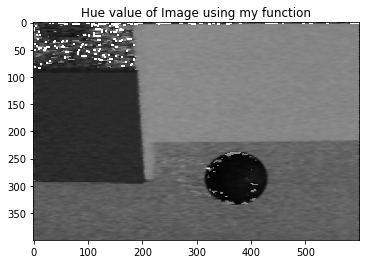

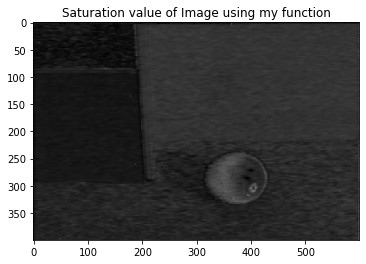

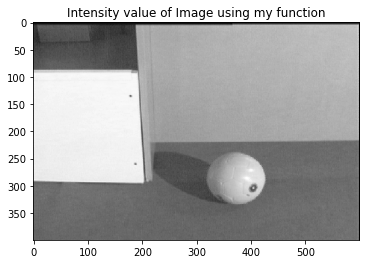

In [21]:

plt.figure()
plt.imshow(h,cmap = 'gray')
plt.title("Hue value of Image using my function")

plt.figure()
plt.imshow(s,cmap = 'gray')
plt.title("Saturation value of Image using my function")

plt.figure()
plt.imshow(i,cmap = 'gray')
plt.title("Intensity value of Image using my function")

In [17]:
hls = cv2.cvtColor(im3 ,cv2.COLOR_RGB2HLS)

Text(0.5, 1.0, 'Intensity value of Image using inbuilt HLS function')

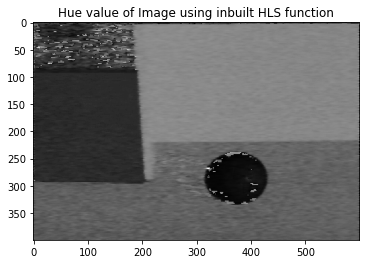

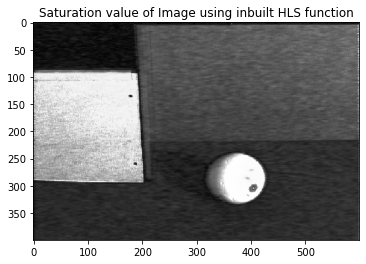

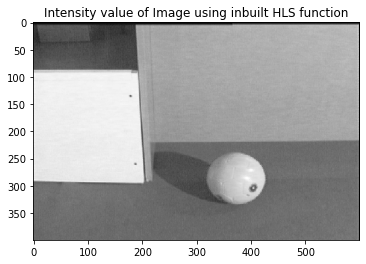

In [22]:
plt.figure()
plt.imshow(hls[:,:,0],cmap = 'gray')
plt.title("Hue value of Image using inbuilt HLS function")


plt.figure()
plt.imshow(hls[:,:,2],cmap = 'gray')
plt.title("Saturation value of Image using inbuilt HLS function")

plt.figure()
plt.imshow(hls[:,:,1],cmap = 'gray')
plt.title("Intensity value of Image using inbuilt HLS function")

Text(0.5, 1.0, 'Difference of Intensity value')

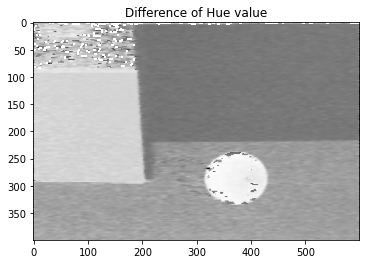

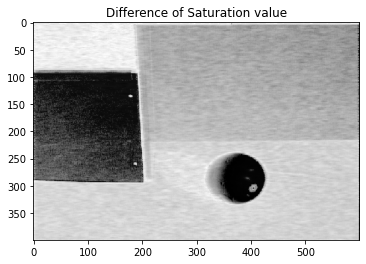

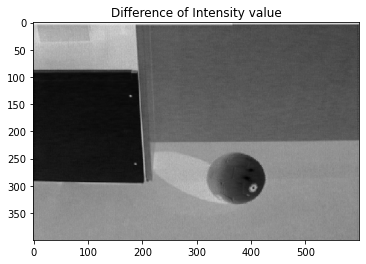

In [20]:
diff_h = h - hls[:,:,0]
diff_s = s - hls[:,:,2]
diff_i = i - hls[:,:,1]

plt.figure()
plt.imshow(diff_h,cmap = 'gray')
plt.title("Difference of Hue value")


plt.figure()
plt.imshow(diff_s,cmap = 'gray')
plt.title("Difference of Saturation value")

plt.figure()
plt.imshow(diff_i , cmap = 'gray')
plt.title("Difference of Intensity value")


##### b) In H-space, find a threshold for the ball. Find the centroid of the ball and indicate its location by a cross on the original color image. 

In [23]:
cv2.imwrite("HSpace.png", hls[:,:,0])

True

In [24]:
gray = cv2.imread("HSpace.png")
gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)


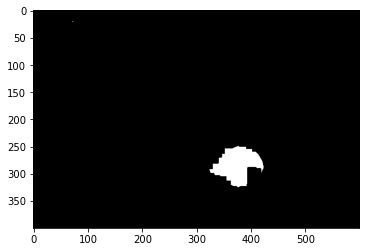

In [25]:
#Blurring so that small shaprness are removed
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Applying threshold to image
thresh = cv2.threshold(blurred, 28, 255, cv2.THRESH_BINARY)[1]

#Inverting threshold so that moment give correct center
thresh = 255-thresh

b = np.array([[1,1,1,1,1] for i in range(5)]) 

## Eroding image to remove small blots 
thresh = cv2.erode(thresh,b)
thresh = cv2.erode(thresh,b)
thresh = cv2.erode(thresh,b)
plt.imshow(thresh,cmap = 'gray')

In [26]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [27]:
len(cnts)

2

In [28]:
im_copy = im3.copy()

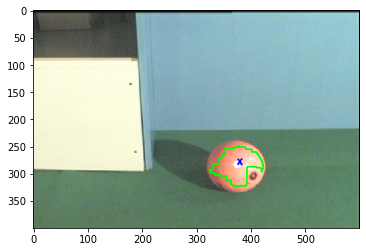

In [29]:
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    #print("Done with M")
    try :
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        #print("Done with cX and cY ",cX ," ",cY)

        
        # draw the contour and center of the shape on the image
        cv2.drawContours(im_copy, [c], -1, (0, 255, 0), 2)
        cv2.circle(im_copy, (cX, cY), 7, (255, 255, 255), -1)
        cv2.putText(im_copy, "X", (cX, cY),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    except :
        a = "Some error"
    # show the image
    plt.imshow(im_copy)
    

#### 4Q. Develop a function to implement Harris corners detection algorithm. Use the function to detect corner points in the given corner_test.png image. Compare the hand crafted function result with built in cv2.cornerHarris() function result to test your code. # 

In [10]:
"""
HarrisCorner Detection . Returns image with corner and list of corner's co-ordinate 
I'm returning corner co-ordinate because it'll helpful for 5th Question 
"""

def HarrisCorner(input_img, k, window_size, threshold):
    
    list_of_corner = []
    output = input_img.copy()
    
    
    input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    
    start = int(window_size/2)
    y_range = input_img.shape[0] - start
    x_range = input_img.shape[1] - start
    
    
    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    
    for y in range(start, y_range):
        for x in range(start, x_range):
            
            #Values of sliding window
            start_y = y - start
            end_y = y + start + 1
            start_x = x - start
            end_x = x + start + 1
            

            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            determinant = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            

            r = determinant - k*(trace**2)

            if r > threshold:
                list_of_corner.append([x, y, r])
                output[y][x] =  [255,0,0]

    
    return list_of_corner, output 

        

In [11]:
im4 = cv2.imread(("C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/corner_test.png"))
im4 = cv2.GaussianBlur(im4, (3, 3), 0)
listt , img = HarrisCorner(im4 ,0.05,3,1000)

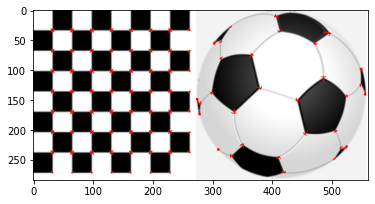

In [12]:
plt.imshow(img , cmap = 'gray')

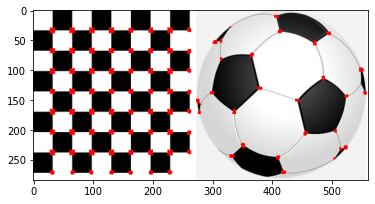

In [13]:
import cv2 
import numpy as np 
  
# loading image
image = cv2.imread('C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/corner_test.png') 
  
# convert the input image into grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# convert the data type 
img_gray = np.float32(img_gray) 
  
# implementing cv2.cornerHarris method 
hcd_img = cv2.cornerHarris(img_gray, 5, 5, 0.0`8) 
  
# marking dilated corners 
hcd_img = cv2.dilate(hcd_img, None) 
  
# reverting back to the original image
image[hcd_img > 0.01 * hcd_img.max()]=[255, 0, 0] 
  
# show the image
plt.imshow(image)

#### 5Q. Write a program to perform robust image matching using RANSAC algorithm and Harris Corner features. Use FM_img1.jpg and FM_img2.jpg to test the program.

In [14]:
img1 = cv2.imread('C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/FM_img1.jpg')  
img2 = cv2.imread('C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/FM_img2.jpg') 


## Finding Corner co-ordinates using HarrisCorner method 
list1 , img1 = HarrisCorner(img1,0.05,3,10)
list2 , img2 = HarrisCorner(img2,0.05,3,10)



Text(0.5, 1.0, 'Img2 with Harris Corner features')

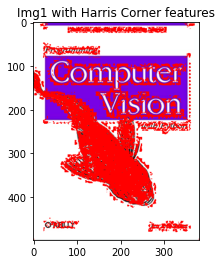

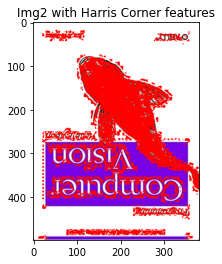

In [15]:
plt.figure()
plt.imshow(img1)
plt.title("Img1 with Harris Corner features")


plt.figure()
plt.imshow(img2)
plt.title("Img2 with Harris Corner features")

In [16]:
sift = cv2.SIFT_create()

In [17]:
## Converting Corner points to keypoints so that they can be used further 
keypoints1 = [cv2.KeyPoint(x[1], x[0], 1) for x in list1]
keypoints2 = [cv2.KeyPoint(x[1], x[0], 1) for x in list2]

In [18]:
keypoints1, descriptor1 = sift.compute(img1,keypoints1)
keypoints2 , descriptor2 = sift.compute(img2,keypoints2)

In [24]:
%%time

"""
This is for finding best matches using descriptor generated from keypoints . 
So this takes some time of 2-3 minutes to run 
"""

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptor1,descriptor2)
matches = sorted(matches, key = lambda x:x.distance)

print(len(matches))

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 2)
search_params = dict(checks = 50)

print("Done with searh_param")

flann = cv2.FlannBasedMatcher(index_params, search_params)

print("Done with Flann Based matcher")

matches = flann.knnMatch(descriptor1,descriptor2,k=2)

good_matches = []
for m,n in matches[:5000]:
    if m.distance < 0.7*n.distance:
        good_matches.append(m)



7200
Done with searh_param
Done with Flann Based matcher
Wall time: 4min 8s


In [51]:

src_pts = np.float32([ keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,15.0)
matchesMask = mask.ravel().tolist()

h,w,d = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)

img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

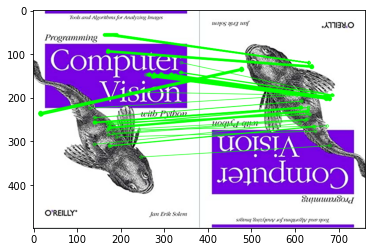

(<matplotlib.image.AxesImage at 0x2bdf7f096a0>, None)

In [52]:
img1 = cv2.imread('C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/FM_img1.jpg')  
img2 = cv2.imread('C:/Users/JPG/Desktop/IVP/CSL442_IVP_S21_Programming_Assignment-2/FM_img2.jpg') 

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,keypoints1,img2,keypoints2,good_matches,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()